# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather["sys"]["country"]
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | urangan
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | west island
Processing Record 4 of Set 1 | gadzhiyevo
Processing Record 5 of Set 1 | labrador city
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | longyearbyen
Processing Record 8 of Set 1 | charters towers
Processing Record 9 of Set 1 | vorgashor
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | hastings
Processing Record 12 of Set 1 | ormond-by-the-sea
Processing Record 13 of Set 1 | barra
Processing Record 14 of Set 1 | rechka-vydrino
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | unai
Processing Record 17 of Set 1 | huarmey
Processing Record 18 of Set 1 | puerto natales
Processing Record 19 of Set 1 | utrik
Processing Record 20 of Set 1 | nouna
Processing Record 21 of Set 1 | baiti
Processing Record 22 of Set 1 | ancaster
Processing Recor

Processing Record 42 of Set 4 | puerto san carlos
City not found. Skipping...
Processing Record 43 of Set 4 | palopo
Processing Record 44 of Set 4 | tual
Processing Record 45 of Set 4 | enewetak
Processing Record 46 of Set 4 | port elizabeth
Processing Record 47 of Set 4 | colonia
Processing Record 48 of Set 4 | saint-joseph
Processing Record 49 of Set 4 | yaren
Processing Record 0 of Set 5 | sinabang
Processing Record 1 of Set 5 | plainview
Processing Record 2 of Set 5 | jianshui
Processing Record 3 of Set 5 | longmen
Processing Record 4 of Set 5 | gaalkacyo
Processing Record 5 of Set 5 | talnakh
Processing Record 6 of Set 5 | newman
Processing Record 7 of Set 5 | zawiercie
Processing Record 8 of Set 5 | nabire
Processing Record 9 of Set 5 | broome
Processing Record 10 of Set 5 | zouerate
Processing Record 11 of Set 5 | klyuchi
Processing Record 12 of Set 5 | hibbing
Processing Record 13 of Set 5 | enoch
Processing Record 14 of Set 5 | karachev
Processing Record 15 of Set 5 | ust'-kut

Processing Record 37 of Set 8 | nizhneangarsk
Processing Record 38 of Set 8 | darovskoy
Processing Record 39 of Set 8 | santa isabel
Processing Record 40 of Set 8 | leninskoye
Processing Record 41 of Set 8 | emerald
Processing Record 42 of Set 8 | kulob
Processing Record 43 of Set 8 | tralee
Processing Record 44 of Set 8 | lanzhou
Processing Record 45 of Set 8 | dolni dabnik
Processing Record 46 of Set 8 | chateaubriant
Processing Record 47 of Set 8 | ocos
Processing Record 48 of Set 8 | nantucket
Processing Record 49 of Set 8 | kapuskasing
Processing Record 0 of Set 9 | hammerfest
Processing Record 1 of Set 9 | novodvinsk
Processing Record 2 of Set 9 | acapulco de juarez
Processing Record 3 of Set 9 | korotchaevo
City not found. Skipping...
Processing Record 4 of Set 9 | sonsorol village
City not found. Skipping...
Processing Record 5 of Set 9 | borogontsy
Processing Record 6 of Set 9 | northam
Processing Record 7 of Set 9 | muang phonsavan
Processing Record 8 of Set 9 | leeton
Proces

Processing Record 24 of Set 12 | axim
Processing Record 25 of Set 12 | dien bien phu
Processing Record 26 of Set 12 | as sulayyil
Processing Record 27 of Set 12 | shahrak
Processing Record 28 of Set 12 | alaghsas
Processing Record 29 of Set 12 | la passe
Processing Record 30 of Set 12 | rovnoye
Processing Record 31 of Set 12 | yinchuan
Processing Record 32 of Set 12 | nizhniy kuranakh
Processing Record 33 of Set 12 | ierapetra
Processing Record 34 of Set 12 | sredets
-----------------------------
Data Retrieval Complete      
-----------------------------


In [11]:
city_weather = requests.get(city_url).json()
city_weather

{'coord': {'lon': 27.179, 'lat': 42.3475},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 1.06,
  'feels_like': -0.36,
  'temp_min': 1.06,
  'temp_max': 1.06,
  'pressure': 1028,
  'humidity': 89,
  'sea_level': 1028,
  'grnd_level': 1024},
 'visibility': 10000,
 'wind': {'speed': 1.38, 'deg': 268, 'gust': 1.42},
 'clouds': {'all': 73},
 'dt': 1706916991,
 'sys': {'type': 1,
  'id': 6360,
  'country': 'BG',
  'sunrise': 1706937818,
  'sunset': 1706973981},
 'timezone': 7200,
 'id': 731016,
 'name': 'Sredets',
 'cod': 200}

In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,urangan,-25.3000,152.9000,30.67,72,5,2.24,AU,1706916896
1,albany,42.6001,-73.9662,1.72,79,91,0.45,US,1706916896
2,west island,-12.1568,96.8225,27.99,83,40,4.63,CC,1706916812
3,gadzhiyevo,69.2551,33.3362,-10.54,91,66,6.10,RU,1706916897
4,labrador city,52.9463,-66.9114,-23.05,68,0,1.03,CA,1706916897


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,urangan,-25.3000,152.9000,30.67,72,5,2.24,AU,1706916896
1,albany,42.6001,-73.9662,1.72,79,91,0.45,US,1706916896
2,west island,-12.1568,96.8225,27.99,83,40,4.63,CC,1706916812
3,gadzhiyevo,69.2551,33.3362,-10.54,91,66,6.10,RU,1706916897
4,labrador city,52.9463,-66.9114,-23.05,68,0,1.03,CA,1706916897


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

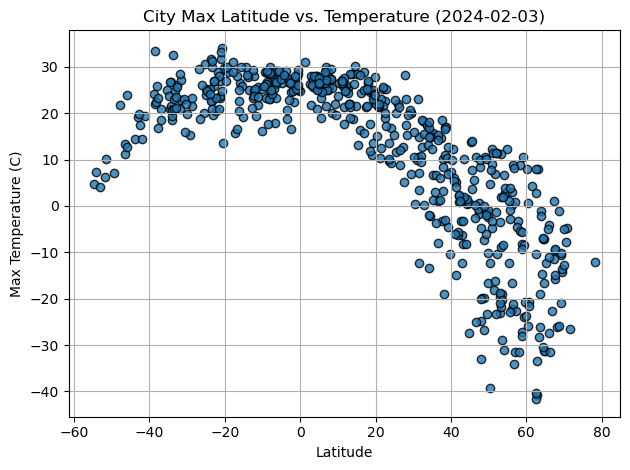

In [21]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

plt.scatter(x_values, y_values, alpha=.8, edgecolors="k")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2024-02-03)")
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

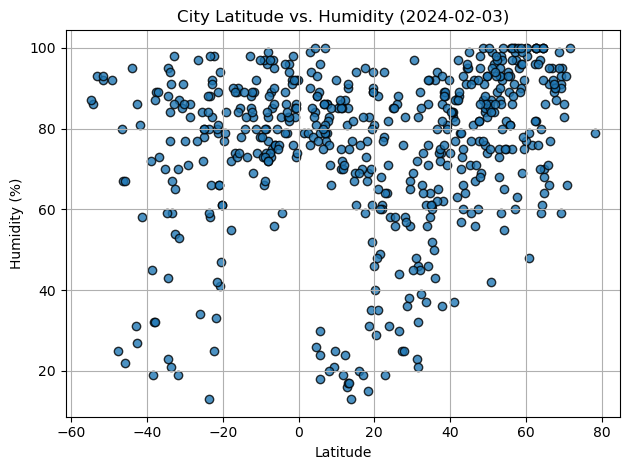

In [24]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

plt.scatter(x_values, y_values, alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2024-02-03)")
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

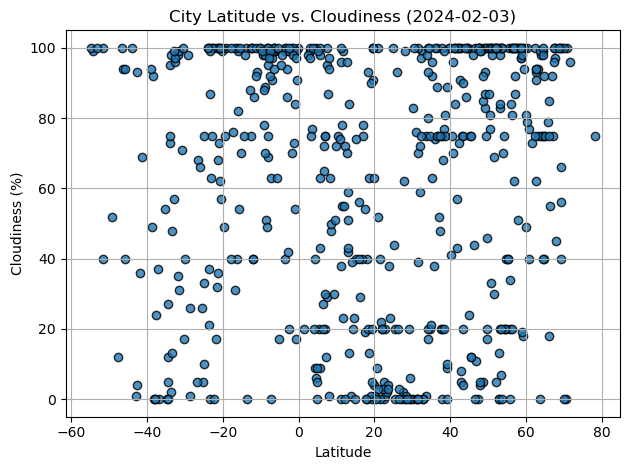

In [25]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

plt.scatter(x_values, y_values, alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2024-02-03)")
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

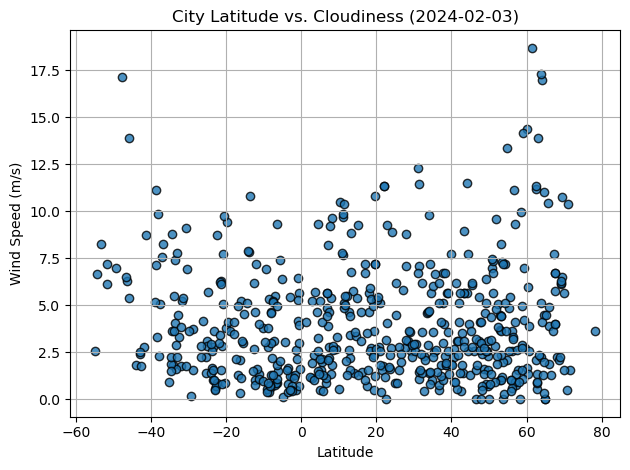

In [27]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

plt.scatter(x_values, y_values, alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Cloudiness (2024-02-03)")
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [29]:
# Define a function to create Linear Regression plots

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,albany,42.6001,-73.9662,1.72,79,91,0.45,US,1706916896
3,gadzhiyevo,69.2551,33.3362,-10.54,91,66,6.10,RU,1706916897
4,labrador city,52.9463,-66.9114,-23.05,68,0,1.03,CA,1706916897
6,longyearbyen,78.2186,15.6401,-12.09,79,75,3.60,SJ,1706916897
8,vorgashor,67.5833,63.9500,-15.70,90,97,4.02,RU,1706916897


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,urangan,-25.3000,152.9000,30.67,72,5,2.24,AU,1706916896
2,west island,-12.1568,96.8225,27.99,83,40,4.63,CC,1706916812
5,port-aux-francais,-49.3500,70.2167,7.15,92,52,6.98,TF,1706916897
7,charters towers,-20.1000,146.2667,29.36,61,99,3.76,AU,1706916897
9,grytviken,-54.2811,-36.5092,7.37,86,99,6.67,GS,1706916897


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.824874136603332


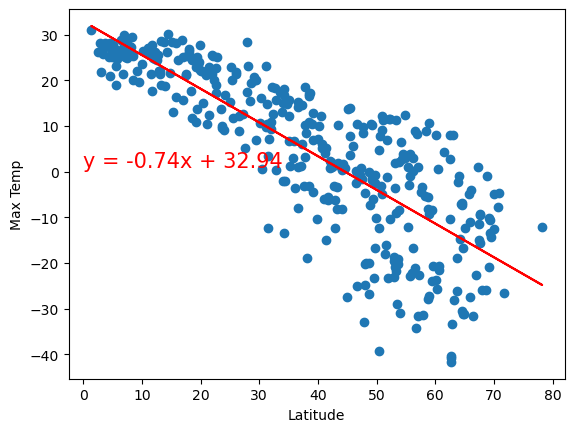

In [41]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

print(f"The r-value is: {rvalue}")

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,1),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

The r-value is: 0.5323940422530149


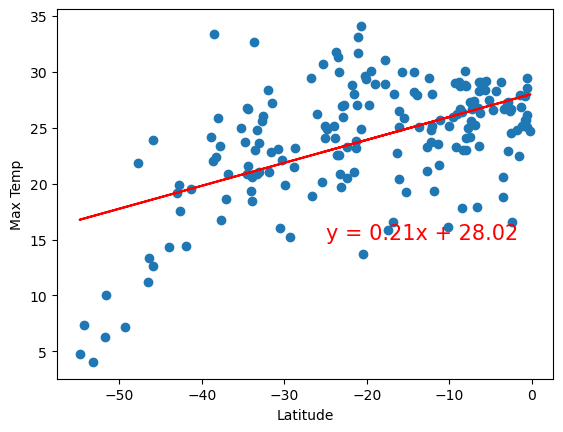

In [46]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

print(f"The r-value is: {rvalue}")

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

**Discussion about the linear relationship:** 
- The regression displays that there is a negative relationship between temperature and latitude in the Northern Hemisphere. 
- There is a positve correlation between the latitude and max temperature in the Northern Hemisphere with the value correlation being -0.824874136603332 and the points and line on the graph trending downwards.
- In the Northern hemisphere, as the latitude increases the max temperature decreases.

- The regression displays that there is a positive relationship between temperature and latitude in the Southern Hemisphere. 
- There is a negative correlation between the latitude and max temperature in the Southern Hemisphere with the value correlation being 0.5323940422530149 and the points and line on the graph trending upwards.
- In the Southern hemisphere, as the latitude increases the max temperature increases. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3579368753477065


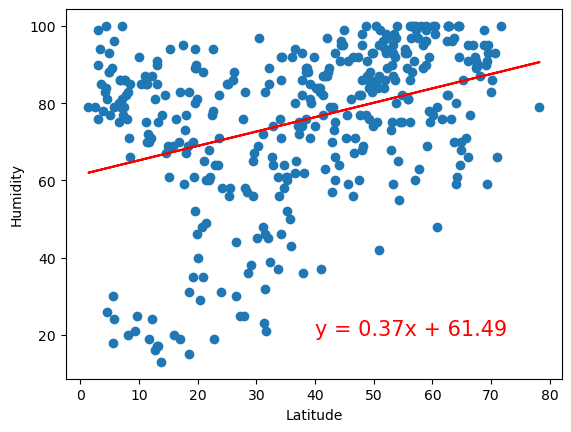

In [47]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

print(f"The r-value is: {rvalue}")

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The r-value is: 0.3063135425878776


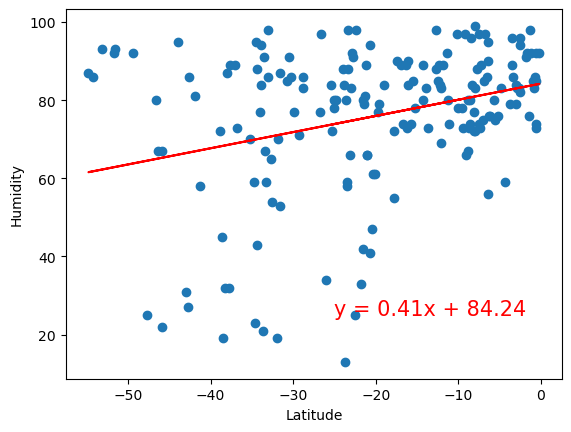

In [48]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

print(f"The r-value is: {rvalue}")

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

**Discussion about the linear relationship:** 
- The regression displays that there is a positive relationship between humidity and latitude in the Northern Hemisphere. 
- There is a positve correlation between the latitude and humidity in the Northern Hemisphere with the value correlation being 0.3579368753477065 and the points and line on the graph trending upwards.
- In the Northern hemisphere, as the latitude increases the humidity decreases.

- The regression displays that there is a positive relationship between humidity and latitude in the Southern Hemisphere. 
- There is a positive correlation between the latitude and humidity in the Southern Hemisphere with the value correlation being 0.3063135425878776 and the points and line on the graph trending upwards.
- In the Southern hemisphere, as the latitude increases the humidity increases as well. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.280509220984841


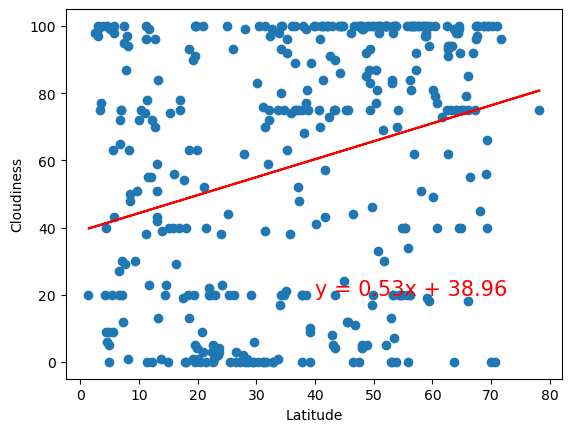

In [49]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

print(f"The r-value is: {rvalue}")

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r-value is: 0.31843551034314627


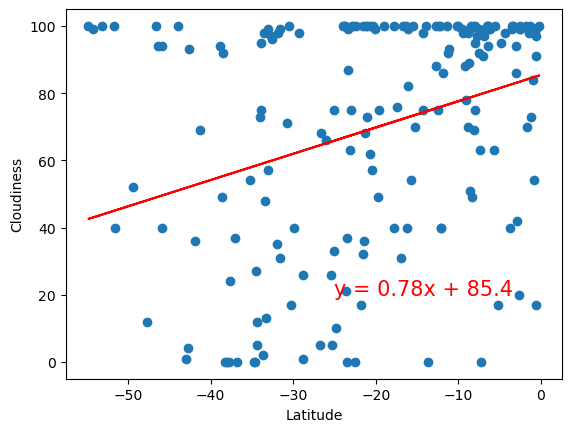

In [56]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

print(f"The r-value is: {rvalue}")

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:** 
- The regression displays that there is a no relationship between temperature and cloudiness in the Northern Hemisphere. 
- There is a positve correlation between the latitude and cloudiness in the Northern Hemisphere with the value correlation being 0.280509220984841 and the line on the graph is trending upwards.
- In the Northern hemisphere, the increase in latitude seems to have no correlation with the increase in cloudiness.

- The regression displays that there is a no relationship between temperature and cloudiness in the Southern Hemisphere. 
- There is a positive correlation between the latitude and cloudiness in the Southern Hemisphere with the value correlation being 0.31843551034314627 and the line on the graph is trending upwards.
- In the Southern hemisphere, the increase in latitude seems to have no correlation with the increase in cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.058387020974811285


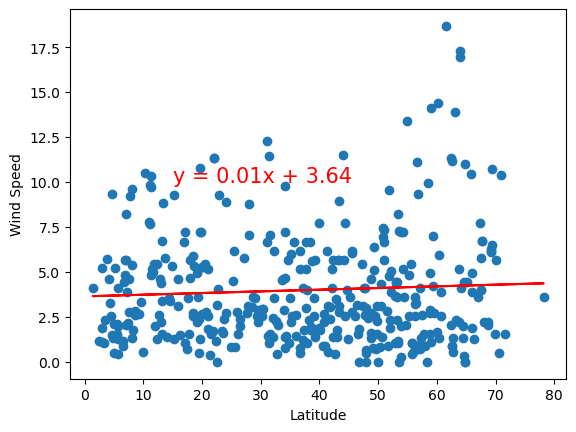

In [60]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

print(f"The r-value is: {rvalue}")

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

The r-value is: -0.3662320781730532


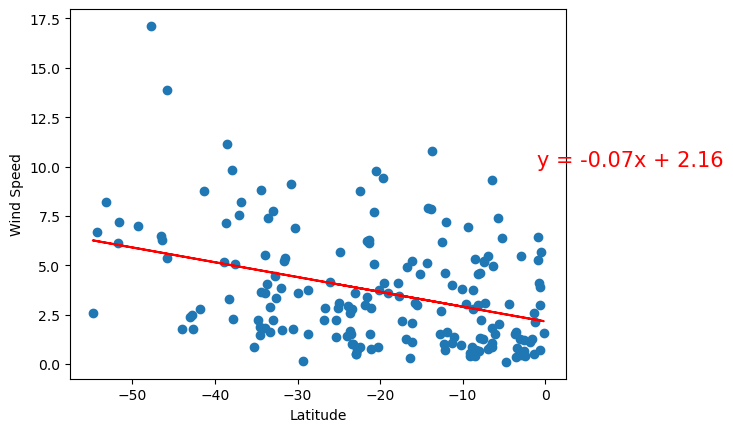

In [67]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

print(f"The r-value is: {rvalue}")

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-1,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:**
- The regression displays that there is no relationship between wind speed and latitude in the Northern Hemisphere. 
- There is a positve correlation between the latitude and wind speed in the Northern Hemisphere with the value correlation being 0.058387020974811285 and the points and line on the graph trending downwards.
- In the Northern hemisphere, as the latitude increases the wind speed slightly increases.

- The regression displays that there is a negative relationship between wind speed and latitude in the Southern Hemisphere. 
- There is a negative correlation between the latitude and wind speed in the Southern Hemisphere with the value correlation being -0.3662320781730532 and the points and line on the graph trending upwards.
- In the Southern hemisphere, as the latitude increases the wind speed decreases. 